# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
#модуль для разделения выборки
from sklearn.model_selection import train_test_split
#модуль для получения структуры данных для классификации деревом решений
from sklearn.tree import DecisionTreeClassifier
#модуль метрик качества
from sklearn.metrics import accuracy_score
#модуль для работы со структурой данных "Случайный лес"
from sklearn.ensemble import RandomForestClassifier
#инициализация модели логистической регрессии
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import operator

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.calls = df.calls.astype('int64')
df.messages = df.messages.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
сalls — количество звонков,
minutes — суммарная длительность звонков в минутах,
messages — количество sms-сообщений,
mb_used — израсходованный интернет-трафик в Мб,
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Вывод
Тип данных у количества звонков и количества сообщений должен быть целочисленный - корректировка внесена. Объём датасета 3214 записей. Т.к данные уже предобработаны, то можно начинать их анализировать.

## Разбейте данные на выборки

In [5]:
df_teach, df_other = train_test_split(df, test_size=.25, random_state=12345)
df_test, df_valid = train_test_split(df_other, test_size=.5, random_state=12345)
print('The size of training sample -', df_teach.shape) # 75% data sets
print('The size of testing sample -', df_test.shape) # 12.5% datasets
print('The size of validation sample -', df_valid.shape) #12.5# data sets

The size of training sample - (2410, 5)
The size of testing sample - (402, 5)
The size of validation sample - (402, 5)


In [6]:
#для обучающей выборки
features = df_teach.drop('is_ultra', axis=1)
target = df_teach['is_ultra']
#для тестовой выборки
features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']
#для валидационной выборки
features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']

#предпросмотр
features.head()

,calls,minutes,messages,mb_used
101,107,804.97,66,17935.91
1915,69,429.68,28,17314.66
88,48,331.33,0,8000.36
1348,69,528.67,47,22323.98
2264,51,310.77,22,24936.54


## Исследуйте модели

Воспользуемся тремя основными моделями: дерево решения, случайный лес и логистическая регрессия.

### Дерево решения

depth: (valid sample) 9, (teach sample) 25;
accuracy: (valid sample) 0.7985, (teach sample) 0.7214


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '35'),
  Text(35, 0, '36'),
  Text(36, 0, '37'),
  Text(37, 0, '38'),

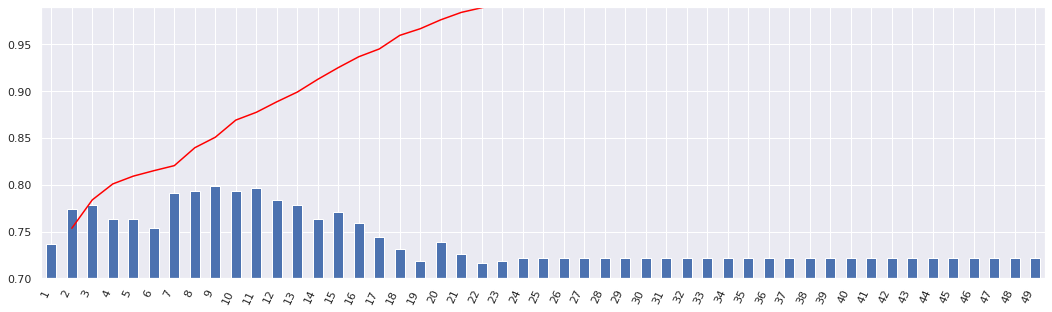

In [7]:
ac_depth={}
ac_depth_teach_sample={}
for depth in range(1,50):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features, target)
    predictions = model_tree.predict(features_valid)
    accuracy = round(accuracy_score(target_valid, predictions),4)
    accuracy_teach_sample = round(model_tree.score(features, target),4)
    ac_depth[depth] = accuracy
    ac_depth_teach_sample[depth] = accuracy_teach_sample
    
print('depth: (valid sample) {}, (teach sample) {};\n\
accuracy: (valid sample) {:.4f}, (teach sample) {:.4f}'\
      .format(\
              max(ac_depth.items(),key=operator.itemgetter(1))[0],\
              max(ac_depth_teach_sample.items(),key=operator.itemgetter(1))[0],\
              ac_depth[max(ac_depth.items(),key=operator.itemgetter(1))[0]],\
              ac_depth[max(ac_depth_teach_sample.items(),key=operator.itemgetter(1))[0]],\
             )\
     )
#plt.figure(figsize=(20,5))

pd.Series(ac_depth).plot.bar(ylim=(.7,.85),figsize=(18,5))
pd.Series(ac_depth_teach_sample).plot.line(ylim=(.7,.99),figsize=(18,5), color='red')
plt.xticks(rotation=65, horizontalalignment='right')

**Вывод**

Глубина решеющего дерева не должна быть больше 9, т.к. соглачно графику при глубине выше 9, наступает перобучение и качество модели падает, что явно видно на графике. Значит достижимый уровень accuracy с помощью решающего дерева 0.7985, при гиперпараметре max_depth=9.

### Случайный лес

estim: (valid sample) 26, (teach sample) 61;
accuracy: (valid sample) 0.7935, (teach sample) 1.0000


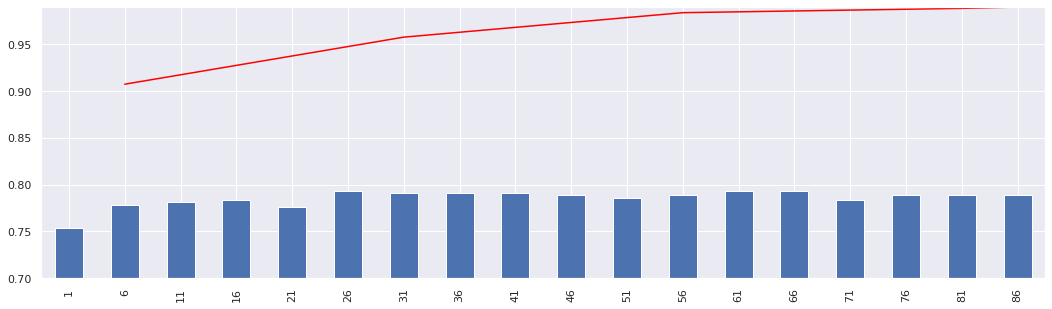

In [8]:
ac_estim = {}
ac_estim_teach_sample = {}
for estim in range (1,91,5):
    model_forest = RandomForestClassifier(random_state=12345,n_estimators=estim)
    model_forest.fit(features, target)
    predictions = model_forest.predict(features_valid)
    score = round(model_forest.score(features_valid, target_valid),4)
    ac_estim[estim] = score

    score = round(model_forest.score(features, target),4)
    ac_estim_teach_sample[estim] = score

print('estim: (valid sample) {}, (teach sample) {};\n\
accuracy: (valid sample) {:.4f}, (teach sample) {:.4f}'\
      .format(\
              max(ac_estim.items(),key=operator.itemgetter(1))[0],\
              max(ac_estim_teach_sample.items(),key=operator.itemgetter(1))[0],\
              ac_estim[max(ac_estim.items(),key=operator.itemgetter(1))[0]],\
              ac_estim_teach_sample[max(ac_estim_teach_sample.items(),key=operator.itemgetter(1))[0]]\
             )\
     )

#ac_estim.values.max()
pd.Series(ac_estim_teach_sample).plot.line(ylim=(.7,.99),figsize=(18,5), color='red')
#plt.show()
pd.Series(ac_estim).plot.bar(ylim=(.7,.99), figsize=(18,5));
plt.show()

Исследуем влияние глубины обучения деревьев

estim: (valid sample) 26, (teach sample) 61;
max_depth: (valid sample) 9, (teach sample) 23;
accuracy: (valid sample) 0.8109, (teach sample) 0.9971


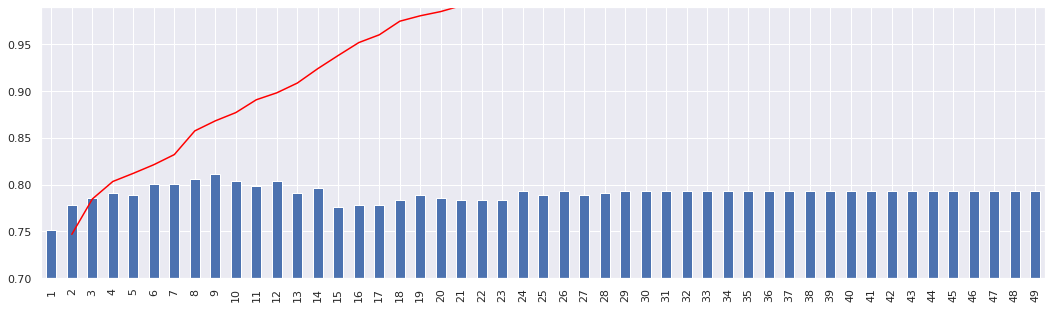

In [9]:
ac_depth = {}
ac_depth_teach_sample = {}
for depth in range (1,50):
    model_forest = RandomForestClassifier(random_state=12345,n_estimators=26, max_depth=depth)
    model_forest.fit(features, target)
    predictions = model_forest.predict(features_valid)
    score = round(model_forest.score(features_valid, target_valid),4)
    ac_depth[depth] = score

    score = round(model_forest.score(features, target),4)
    ac_depth_teach_sample[depth] = score

print('estim: (valid sample) 26, (teach sample) 61;\n\
max_depth: (valid sample) {}, (teach sample) {};\n\
accuracy: (valid sample) {:.4f}, (teach sample) {:.4f}'\
      .format(\
              max(ac_depth.items(),key=operator.itemgetter(1))[0],\
              max(ac_depth_teach_sample.items(),key=operator.itemgetter(1))[0],\
              ac_depth[max(ac_depth.items(),key=operator.itemgetter(1))[0]],\
              ac_depth_teach_sample[max(ac_depth_teach_sample.items(),key=operator.itemgetter(1))[0]],\
             )\
     )

#ac_estim.values.max()
pd.Series(ac_depth_teach_sample).plot.line(ylim=(.7,.99),figsize=(18,5), color='red')
#plt.show()
pd.Series(ac_depth).plot.bar(ylim=(.7,.99), figsize=(18,5));
plt.show()

В следующем цикле идёт поиск оптимальных гиперпараметров с достижением экстремума(максимума) по метрике accuracyю Перебор идёт по следующим гиперпараметрам: критерий вершины, n_estimators (количество деревьев), глубина обучения деревьев, функция разбиения

In [11]:
%%time

user_check = int(input('Следующий цикл будет отрабатывать 1 час 11 минут, вы уверены, что готовы его запустить:\n\
Введите "1", если готовы\n\
Введите "0", усли хотите его пропустить\n\n'))

if user_check==1:
    print('\n\n!!!!!!!!!!\nЗапущен цикл на 1 час 11 минут')
    counter=0
    stat = pd.DataFrame(columns=['criterion', 'estim','depth','features','accuracy'])
    for criterion in ['gini', 'entropy']:
        for estim in range(1,50):
            for depth in range(1,50):
                for f in ['auto', 'sqrt', 'log2',  None]:
                    model_forest = RandomForestClassifier(\
                                                          criterion = criterion,\
                                                          random_state=12345\
                                                          , n_estimators=estim\
                                                          , max_depth=depth\
                                                          , max_features=f\
                                                         )
                    model_forest.fit(features, target)
                    predictions = model_forest.predict(features_valid)
                    accuracy = round(accuracy_score(target_valid, predictions),8)
                    #score = round(model_forest.score(features_valid, target_valid),8)

                    stat.loc[counter]=[criterion,estim,depth,f,accuracy]
                    counter += 1
    print('Максимальное значение accuracy -',stat.accuracy.max()) 
else:
    print('\n\n!!!!!!!!!!\nЦикл пропущен')          

Следующий цикл будет отрабатывать 1 час 11 минут, вы уверены, что готовы его запустить:
Введите "1", если готовы
Введите "0", усли хотите его пропустить

1


!!!!!!!!!!
Запущен цикл на 1 час 11 минут
Максимальное значение accuracy - 0.81343284
CPU times: user 44min 37s, sys: 7.7 s, total: 44min 45s
Wall time: 44min 50s


In [12]:
stat.accuracy.max()

0.81343284

In [13]:
stat['estim'] = stat['estim'].astype('int64')
temp_stat = stat[(stat['accuracy']==stat.accuracy.max())]
temp_stat[(temp_stat['estim']==temp_stat.estim.min())]

,criterion,estim,depth,features,accuracy
2780,gini,15,10,auto,0.813433
2781,gini,15,10,sqrt,0.813433
2782,gini,15,10,log2,0.813433


**Вывод**

Максимальное значение доступно при критерии - "джини", количеством деревьев - 15, глубины 10 и features - (с любым параметром). При другом критерии - "энтропия", также можно достигнуть accuracy уровня 0.8134, но с большим количеством деревьев и большей глубиной обучения деревьев. Но стоит заметить, что точность начинает совпадать на уровне сотой и без перебора всех параметров, достаточно найти нужное количество деревьев, а затем найти нужную глубину, но данное решение не будет оптимальным, т.к. при переборе 4х параметров было обнаружено, что можно обойтись и 15 деревьями.

### Логистическая регрессия

In [14]:
model_lp = LogisticRegression(random_state=12345)
model_lp.fit(features, target)
model_lp.predict(features_valid)
score = model_lp.score(features_valid, target_valid)
score_teach = model_lp.score(features, target)
#accuracy = accuracy_score(target_test, predictions)
print('accuracy valid sample -', round(score,4), ';\n\
accuracy teach sample -',round(score_teach,4))

accuracy valid sample - 0.704 ;
accuracy teach sample - 0.7025


In [15]:
pd.DataFrame(\
            {'Tree' : [9,'NaN',0.7985],\
             'Random forest' : [10,15,0.8134],\
             'LR' : ['NaN','NaN',0.7090],\
            },\
             index = ['max_depth', 'n_estimator', 'accuracy']\
            )

,Tree,Random forest,LR
max_depth,9,10.0000,NaN
n_estimator,NaN,15.0000,NaN
accuracy,0.7985,0.8134,0.709


**Вывод**

Лучшей моделью по метрике accuracy оказалась модель дерево решений, но т.к. разница между деревом решений и случайным лесом на сотом порядке, то лучше взять модель случайного леса. Также требуются дополнительные метрики, для более сбалансированного вывода.

## Проверьте модель на тестовой выборке

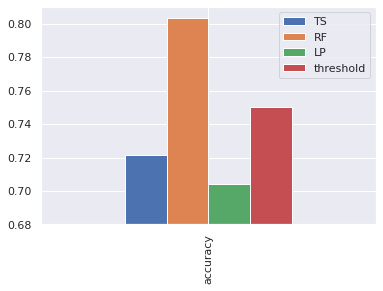

In [16]:
model_forest = RandomForestClassifier(random_state=12345,\
                                      criterion='gini',\
                                      n_estimators=15,\
                                      max_depth=10,\
                                      max_features = 'auto'\
                                     )

model_forest.fit(features, target)
predictions = model_forest.predict(features_test)
model_tree.score(features_test, target_test)
model_forest.score(features_test, target_test)
model_lp.score(features_test, target_test)
pd.DataFrame({'TS': [model_tree.score(features_test, target_test)],\
              'RF': [model_forest.score(features_test, target_test)],\
              'LP': [model_lp.score(features_test, target_test)],\
              'threshold' :[0.75]
             }, index=['accuracy']).plot.bar(ylim=(.68,.81));

**Вывод**

Как и предполаглось, что модель на основе RF даст лучший результат, и будет выше порогового значения на порядок 5%. Требуется для более лучшей отработки добавить в модели дополнительные гиперпараметры и проверить дополнительные метрики.

## (бонус) Проверьте модели на адекватность

In [17]:
#Проверим, даст ли случайное заполнение результат выше чем при RF.
predictions_ultra = pd.Series(1, index=target_test.index)
accuracy = round(accuracy_score(target_test, predictions_ultra),4)
accuracy - model_forest.score(features_test, target_test)

-0.4999825870646766

In [18]:
#Проверим, даст ли случайное заполнение результат выше чем при RF.
predictions_ultra = pd.Series(0, index=target_test.index)
accuracy = round(accuracy_score(target_test, predictions_ultra),4)
accuracy - model_forest.score(features_test, target_test)

-0.10698258706467656

In [19]:
#Проверим, даст ли случайное заполнение результат выше чем при RF.
predictions_ultra = pd.Series(1, index=target_test.index)
predictions_ultra[202:]=0
accuracy = round(accuracy_score(target_test, predictions_ultra),4)
accuracy - model_forest.score(features_test, target_test)

-0.2959825870646766

**Вывод**

Тест на адекватность пройден, т.к. сравнение было было с случайным заполнением все перешли ну тариф ultra, затем на smart, затем на 50/50 и модельное заполнение лучше заполняет по сравнению со случайным, но всё равно не на 100% верно.